# Part 1: Modeling Challenge  
Objective: Given measurements of breast cancer cells, to predict for each cell, whether is it malignant or benign. 

In [1]:
#Load basic library
import pandas as pd
import numpy as np
import random

#Load plotting libraries
import matplotlib.pyplot as plt
import seaborn as sns

#Load Modeling library
from sklearn.model_selection import train_test_split

from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix

from sklearn.feature_selection import RFE

## 1.0 A Python Coding and Data Set
### 1.1 Get & Transform Data  
Load in the data file and header file provided and attach header to the dataframe columns' name.  

In [2]:
print("1.1 Get Data")
#1.0 Get Data
print("\n")
source_path = "WorkingFolder/breast-cancer.csv"
df_breastcancer_data = pd.read_csv(source_path, header = None)
print("1.1.1 Get & Observe Data from " + source_path)
print(df_breastcancer_data.info())
print(df_breastcancer_data.head())

print("\n")
#Get Header
header_path = "WorkingFolder/field_names.txt"
file_header = open(header_path, "r")
content_header = file_header.read()
list_header = content_header.split("\n")
print("1.1.2 Get & Observe Header from " + header_path)
print(list_header)

print("\n")
#Attach Column Name
print("1.1.3 Attach Meaningful Header to dataframe")
df_breastcancer_data.columns = list_header
print(df_breastcancer_data.head())

print("\n")
print("1.1.4 Check final dataset")
print("Dataframe dimensions : {}".format(df_breastcancer_data.shape))
#The dataset contains 569 records and 32 columns
print(df_breastcancer_data.describe(include='all'))
print("\n")
print("Distribution of cancer data")
print(df_breastcancer_data['diagnosis'].value_counts())

1.1 Get Data


1.1.1 Get & Observe Data from WorkingFolder/breast-cancer.csv
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       569 non-null    int64  
 1   1       569 non-null    object 
 2   2       569 non-null    float64
 3   3       569 non-null    float64
 4   4       569 non-null    float64
 5   5       569 non-null    float64
 6   6       569 non-null    float64
 7   7       569 non-null    float64
 8   8       569 non-null    float64
 9   9       569 non-null    float64
 10  10      569 non-null    float64
 11  11      569 non-null    float64
 12  12      569 non-null    float64
 13  13      569 non-null    float64
 14  14      569 non-null    float64
 15  15      569 non-null    float64
 16  16      569 non-null    float64
 17  17      569 non-null    float64
 18  18      569 non-null    float64
 19  19      569 non-null    float64
 20 

The malignant or benign tumors sample data consists of 569 records and 32 attributes.  

### 1.2 Inspect Data

In [3]:
print("1.2.0 Inspect Data")
#2.0 Explore Data
print("\n")
#2.1 Check for missing data  
print("1.2.1 Check if there is any missing or null data points to remove")
print(df_breastcancer_data.isnull().sum())

print("\n")
print("1.2.2 Filter diagnosis by smoothness and compactness")
key_cols = ['ID', 'diagnosis']
select_cols = key_cols
substr_smoothness = 'smoothness'
list_smoothness = [s for s in list_header if substr_smoothness in s]
select_cols += list_smoothness
#print(list_smoothness)
substr_compactness = 'compactness'
list_compactness = [s for s in list_header if substr_compactness in s]
select_cols += list_compactness
#print(list_compactness)
print(select_cols)

#Check mean and median
df_breastcancer_data_inspec01 = df_breastcancer_data[select_cols]

1.2.0 Inspect Data


1.2.1 Check if there is any missing or null data points to remove
ID                            0
diagnosis                     0
radius_mean                   0
radius_sd_error               0
radius_worst                  0
texture_mean                  0
texture_sd_error              0
texture_worst                 0
perimeter_mean                0
perimeter_sd_error            0
perimeter_worst               0
area_mean                     0
area_sd_error                 0
area_worst                    0
smoothness_mean               0
smoothness_sd_error           0
smoothness_worst              0
compactness_mean              0
compactness_sd_error          0
compactness_worst             0
concavity_mean                0
concavity_sd_error            0
concavity_worst               0
concave_points_mean           0
concave_points_sd_error       0
concave_points_worst          0
symmetry_mean                 0
symmetry_sd_error             0
symmetry_worst   

There is no missing value records to be removed.

#### A. Compute the mean and median smoothness and compactness for benign and malignant tumors - do they differ? Explain how you would identify this.  

A.1 Density Plot of Smoothness by diagnosis


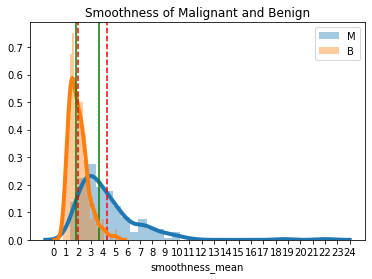


Mean: 

           smoothness_mean
diagnosis                 
B                 2.000321
M                 4.323929

Median:  

           smoothness_mean
diagnosis                 
B                   1.8510
M                   3.6795


In [4]:
print("A.1 Density Plot of Smoothness by diagnosis")
#A.1 Density Plot of Smoothness by diagnosis

f, (ax_hist) = plt.subplots(1, sharex=True)
for diagnos in df_breastcancer_data_inspec01.diagnosis.unique():
    # Subset to the airline
    subset = df_breastcancer_data_inspec01[df_breastcancer_data_inspec01['diagnosis'] == diagnos]
    mean = subset.smoothness_mean.mean()
    median = subset.smoothness_mean.median()
    
    p = sns.distplot(subset['smoothness_mean'], hist=True, kde=True, 
             bins=int(30/1), #color = 'darkblue', 
             #hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4}, label = diagnos, ax=ax_hist)
    p.set_xticks(range(25)) 
    ax_hist.axvline(mean, color='r', linestyle='--')
    ax_hist.axvline(median, color='g', linestyle='-')
    
plt.title('Smoothness of Malignant and Benign')
#plt.legend({'Mean':mean,'Median':median})
plt.legend()
plt.show()

print("\nMean: \n")
print(df_breastcancer_data_inspec01.groupby(df_breastcancer_data_inspec01.diagnosis)[['smoothness_mean']].mean())

print("\nMedian:  \n")
print(df_breastcancer_data_inspec01.groupby(df_breastcancer_data_inspec01.diagnosis)[['smoothness_mean']].median())


A.2 Density Plot of compactness by diagnosis


C:\Users\hweesee.teh\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
C:\Users\hweesee.teh\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


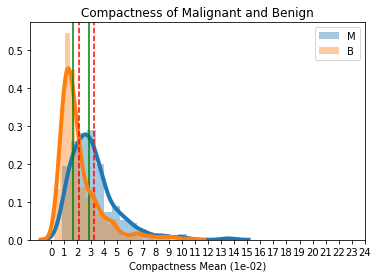


Mean: 

           compactness_mean
diagnosis                  
B                  0.021438
M                  0.032281

Median: 

           compactness_mean
diagnosis                  
B                   0.01631
M                   0.02859


In [5]:
print("A.2 Density Plot of compactness by diagnosis")
#A.2 Density Plot of compactness by diagnosis

# Density Plot and Histogram of compactness by diagnosis
# compactness is less than 0.1, converting it to scientific notation to easy the data checking
from decimal import *
df_breastcancer_data_inspec01['compactness_mean_decimal'] = df_breastcancer_data_inspec01['compactness_mean'].astype(str).apply(lambda x: '%.2E' % Decimal(x))
df_breastcancer_data_inspec01['compactness_mean_decimal_plot'] = df_breastcancer_data_inspec01['compactness_mean'].apply(lambda x: x * 100)

# Iterate through the five airlines
f, (ax_hist) = plt.subplots(1, sharex=True)
for diagnos in df_breastcancer_data_inspec01.diagnosis.unique():
    # Subset to the airline
    subset = df_breastcancer_data_inspec01[df_breastcancer_data_inspec01['diagnosis'] == diagnos]
    mean = subset.compactness_mean.mean()
    mean = mean * 100
    median = subset.compactness_mean.median()
    median = median * 100
    
    p = sns.distplot(subset['compactness_mean_decimal_plot'], hist=True, kde=True, 
             #bins=int(18), #color = 'darkblue', 
             #hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4}, label = diagnos, ax=ax_hist)
    p.set_xticks(range(25)) 
    ax_hist.axvline(mean, color='r', linestyle='--')
    ax_hist.axvline(median, color='g', linestyle='-')
    
plt.title('Compactness of Malignant and Benign')
#plt.legend({'Mean':mean,'Median':median})
plt.xlabel('Compactness Mean (' + '%.e' % Decimal('0.01') + ')')
plt.legend()
plt.show()

print("\nMean: \n")
print(df_breastcancer_data_inspec01.groupby(df_breastcancer_data_inspec01.diagnosis)[['compactness_mean']].mean())

print("\nMedian: \n")
print(df_breastcancer_data_inspec01.groupby(df_breastcancer_data_inspec01.diagnosis)[['compactness_mean']].median())


##### Conclusion:  
By ploting distribution for smoothness and compactness mean for both benign and malignant tumors side by side, it shows that the mean and median of smoothness and compactness for benign and malignant tumors are different. Both smoothness and compactness for benign tumors are smaller and close to half of malignant tumors.  

#### B. Write a function to generate bootstrap samples of the data.  

In [6]:
print("B.1 Function to generate bootstrap samples")
def generate_bootstrap(sample_data, no_of_bsample, bsample_size):
    bsamples = []
    for i in range(no_of_bsample):
        bsample = sample_data.sample(n = bsample_size, replace=True)
        bsamples.append(bsample)
    return bsamples

B.1 Function to generate bootstrap samples


In [7]:
print("B.2 Test the function to generate bootstrap samples")
#testing the bootstrap generation function, to generate 5 sample, each with 300 records from the 569 records we have
no_of_bsample_test = 2
bsample_size_test = 500
bsample_data = generate_bootstrap(df_breastcancer_data, no_of_bsample_test, bsample_size_test)

for i in range(no_of_bsample_test):
    print("********************************************")
    print("Mean: ")
    print(bsample_data[i].groupby(bsample_data[i].diagnosis)[['smoothness_mean', 'compactness_mean']].mean())
    print("\nMedian: ")
    print(bsample_data[i].groupby(bsample_data[i].diagnosis)[['smoothness_mean', 'compactness_mean']].median())
    print("********************************************\n")
    #print(bsample_data[i].info())
    #print(bsample_data[i].head())

B.2 Test the function to generate bootstrap samples
********************************************
Mean: 
           smoothness_mean  compactness_mean
diagnosis                                   
B                 1.993610          0.021114
M                 4.555433          0.031456

Median: 
           smoothness_mean  compactness_mean
diagnosis                                   
B                    1.787           0.01563
M                    3.631           0.02821
********************************************

********************************************
Mean: 
           smoothness_mean  compactness_mean
diagnosis                                   
B                 1.963327          0.020007
M                 4.496680          0.032784

Median: 
           smoothness_mean  compactness_mean
diagnosis                                   
B                    1.746           0.01485
M                    3.999           0.02972
********************************************



The mean and median of smoothness and compactness for each bootstrap samples should be close to the mean and median for full sample.  

## 2.0 Exploratory Analysis  
Identify 2-3 variables that are predictive of a malignant tumor.  

In [8]:
print("2.1 Prepare Data")
#2.1 Prepare Data
print("2.1.1 Encoding categorical diagnosis variable, B = 0; M = 1")
# encoding categorical diagnosis variable, B = 0; M = 1
df_breastcancer_data['diagnosis_type'] = df_breastcancer_data['diagnosis']
encode_diag = {"diagnosis_type":     {"B": 0, "M": 1}}
df_breastcancer_data = df_breastcancer_data.replace(encode_diag)

df_breastcancer_data_inspec02 = df_breastcancer_data
del df_breastcancer_data_inspec02["ID"] #remove ID
df_breastcancer_data_inspec02.head()

2.1 Prepare Data
2.1.1 Encoding categorical diagnosis variable, B = 0; M = 1


diagnosis  radius_mean  radius_sd_error  radius_worst  texture_mean  \
0         M        17.99            10.38        122.80        1001.0   
1         M        20.57            17.77        132.90        1326.0   
2         M        19.69            21.25        130.00        1203.0   
3         M        11.42            20.38         77.58         386.1   
4         M        20.29            14.34        135.10        1297.0   

   texture_sd_error  texture_worst  perimeter_mean  perimeter_sd_error  \
0           0.11840        0.27760          0.3001             0.14710   
1           0.08474        0.07864          0.0869             0.07017   
2           0.10960        0.15990          0.1974             0.12790   
3           0.14250        0.28390          0.2414             0.10520   
4           0.10030        0.13280          0.1980             0.10430   

   perimeter_worst  ...  concave_points_mean  concave_points_sd_error  \
0           0.2419  ...                17.33                   184.60   
1           0.1812  ...                23.41                   158.80   
2           0.2069  ...                25.53                   152.50   
3           0.2597  ...                26.50                    98.87   
4           0.1809  ...                16.67                   152.20   

   concave_points_worst  symmetry_mean  symmetry_sd_error  symmetry_worst  \
0                2019.0         0.1622             0.6656          0.7119   
1                1956.0         0.1238             0.1866          0.2416   
2                1709.0         0.1444             0.4245          0.4504   
3                 567.7         0.2098             0.8663          0.6869   
4                1575.0         0.1374             0.2050          0.4000   

   fractal_dimension_mean  fractal_dimension_sd_error  \
0                  0.2654                      0.4601   
1                  0.1860                      0.2750   
2                  0.2430                      0.3613   
3                  0.2575                      0.6638   
4                  0.1625                      0.2364   

   fractal_dimension_worst  diagnosis_type  
0                  0.11890               1  
1                  0.08902               1  
2                  0.08758               1  
3                  0.17300               1  
4                  0.07678               1  

[5 rows x 32 columns]

### Pearson correlation Filter Method  
Use filter method to select variables that have high Pearson correlation to the diagnosis variables.  
The closest the correlation score to 1, the more the variable correlated to diagnosis.  

In [9]:
print("Compute features correlation with disgnosis variable")
print("\n")
#Compute features correlation with disgnosis variable
#Correlation with output variable
cor = df_breastcancer_data_inspec02.corr()
cor_target = abs(cor["diagnosis_type"])
#Selecting highly correlated features (those with correlation score >0.7)
relevant_features = cor_target[cor_target>0.7]
sel_relevant_features = relevant_features.sort_values(ascending=False)[1:]
sig_cols = sel_relevant_features.keys().tolist()
print("Features and Correlation Score")
print(sel_relevant_features)
print("\n")
print("Variables that are predictive of a malignant tumor")
print(sig_cols)


Compute features correlation with disgnosis variable


Features and Correlation Score
fractal_dimension_mean     0.793566
concave_points_sd_error    0.782914
perimeter_sd_error         0.776614
concavity_worst            0.776454
radius_worst               0.742636
concave_points_worst       0.733825
radius_mean                0.730029
texture_mean               0.708984
Name: diagnosis_type, dtype: float64


Variables that are predictive of a malignant tumor
['fractal_dimension_mean', 'concave_points_sd_error', 'perimeter_sd_error', 'concavity_worst', 'radius_worst', 'concave_points_worst', 'radius_mean', 'texture_mean']


#### Conclusion:  
3 variables that are predictive of a malignant tumor (by Pearson correlation Filter Method) are:  
1. fractal_dimension_mean  
2. concave_points_sd_error
3. perimeter_sd_error

#### Visuallized Variables Relationship  
Display the relationship visually and write 1-2 sentences explaining the relationship.  

Correlation Heatmap for all variables




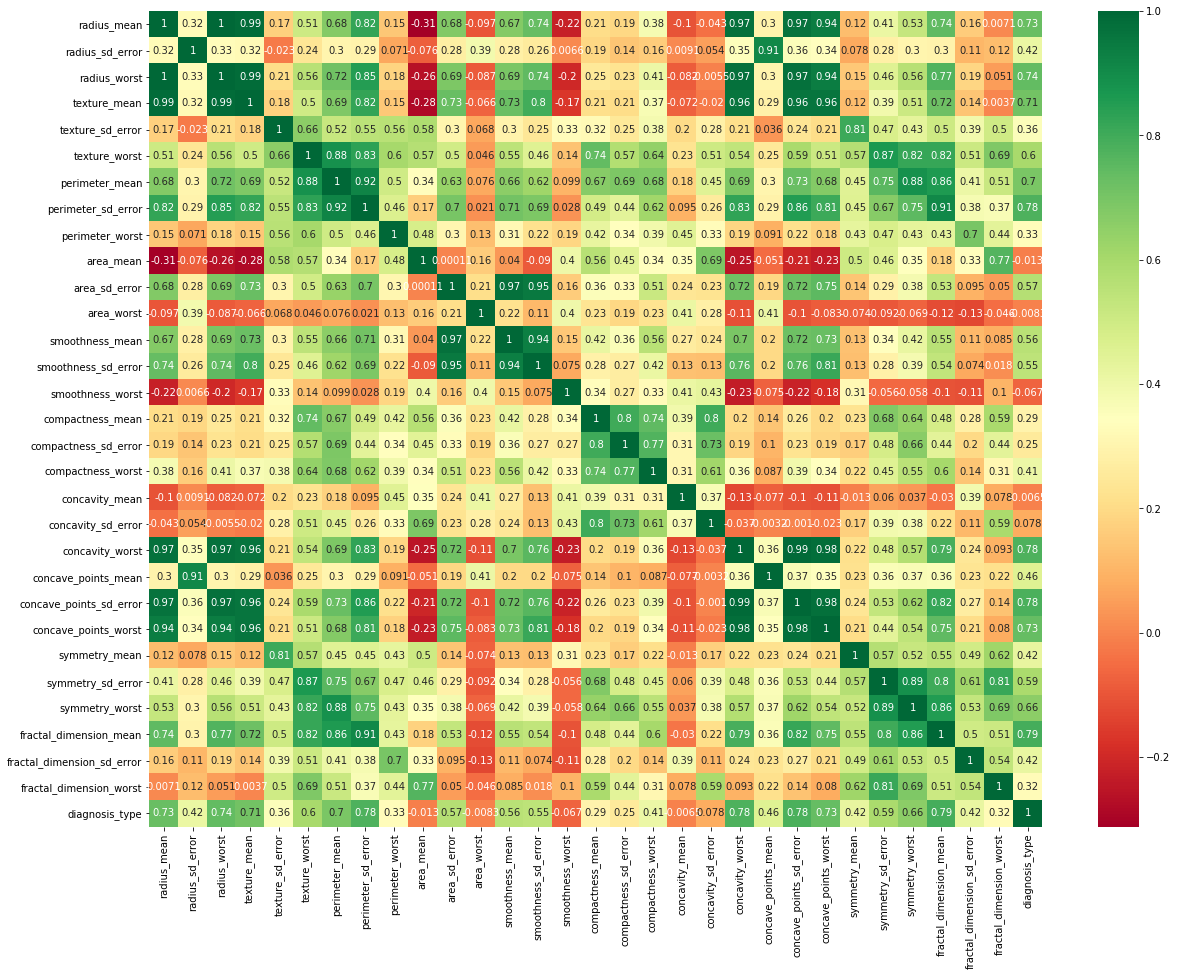

In [10]:
print("Correlation Heatmap for all variables")
print("\n")
#Using Pearson Correlation
plt.figure(figsize=(20,15))
sns.heatmap(cor, annot=True, cmap="RdYlGn") #cmap=plt.cm.Reds
plt.show()

From the correlation plot above, the closer the colerration to 1 (green color in the plot), the more predictive this variable is to the diagnosis.  
Here, fractal_dimension_mean, concave_points_sd_error and perimeter_sd_error are in green color and with correlation above 0.7.  This means that a changes in these attributes can greatly affecting the diagnosis type.  

## 3.0 Modeling  
Build a model to predict the malignant tumors.  
Use at least two classification techniques; compare and contrast the advantages and disadvantages of each.  
Identify how you would control for overfitting in each classification technique.  
Evaluate the performance of each model.  
In each model, identify the most important predictive variables and explain how you identified them.  

### 3.1 Perform Evaluation of 5 most common classification model using features suggested by Pearson correlation Filter Method

In [11]:
print("3.1.1 To avoid overfitting, create more sample using the boostrap sampling function")
no_of_bsample_test = 1
bsample_size_test = 3500
df_breastcancer_data_sample = generate_bootstrap(df_breastcancer_data, no_of_bsample_test, bsample_size_test)[0]

print("3.1.2 Get data with the variables that are predictive to diagnosis")
print("\n")
#get data with the variables that are predictive to diagnosis
model_cols = sig_cols
model_cols += ['diagnosis', 'diagnosis_type']
df_breastcancer_data_model = df_breastcancer_data_sample[model_cols]

3.1.1 To avoid overfitting, create more sample using the boostrap sampling function
3.1.2 Get data with the variables that are predictive to diagnosis




3.1.3 Evaluate 5 most common classification algorithm




C:\Users\hweesee.teh\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\hweesee.teh\Anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\hweesee.teh\Anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\hweesee.teh\Anaconda3\lib\site-p

3.1.4 Models Comparison Chart


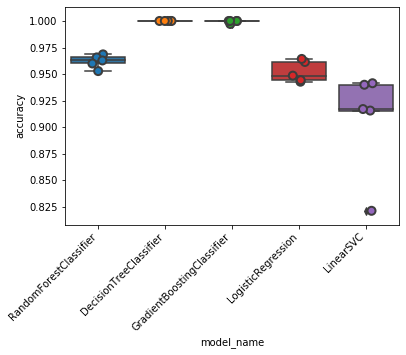

3.1.5 Models Accuracy Summary
model_name
DecisionTreeClassifier        1.000000
GradientBoostingClassifier    0.999429
LinearSVC                     0.907143
LogisticRegression            0.952286
RandomForestClassifier        0.962000
Name: accuracy, dtype: float64


In [12]:
print("3.1.3 Evaluate 5 most common classification algorithm")
print("\n")
#get features and labels
labels = df_breastcancer_data_model['diagnosis_type'] #y
features = df_breastcancer_data_model.iloc[:,:-2].values #x
features_cols = df_breastcancer_data_model.iloc[:,:-2].columns

#Evaluate few classification models
models = [
    RandomForestClassifier(n_estimators=200, max_depth=3, random_state=0),
    DecisionTreeClassifier(),
    GradientBoostingClassifier(random_state=0), 
    LogisticRegression(random_state=0),
    LinearSVC(),
]
CV = 5
cv_df = pd.DataFrame(index=range(CV * len(models)))
entries = []
for model in models:
  model_name = model.__class__.__name__
  accuracies = cross_val_score(model, features, labels, scoring='accuracy', cv=CV)
  for fold_idx, accuracy in enumerate(accuracies):
    entries.append((model_name, fold_idx, accuracy))
cv_df = pd.DataFrame(entries, columns=['model_name', 'fold_idx', 'accuracy'])

print("3.1.4 Models Comparison Chart")
#show comparison result in chart
b = sns.boxplot(x='model_name', y='accuracy', data=cv_df)
s = sns.stripplot(x='model_name', y='accuracy', data=cv_df, 
              size=8, jitter=True, edgecolor="gray", linewidth=2)
b.set_xticklabels(b.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.show()

print("3.1.5 Models Accuracy Summary")
print(cv_df.groupby('model_name').accuracy.mean())

When using the features suggested by Pearson correlation Filter Method, best models are DecisionTreeClassifier (1.000000), GradientBoostingClassifier (0.999429), follow by RandomForestClassifier (0.962000)

### 3.2 Train Model using the 3 Best Algorithm
Based on high level evaluation, let's proceed further with DecisionTreeClassifier, GradientBoostingClassifier and KNeighborsClassifier

In [13]:
print("Cross validation to Control Overfitting")
#To control overfitting in each classification technique, perform cross validation
#Split the dataset to train & test set to evaluate the performance of each model.
df_breastcancer_data_model = df_breastcancer_data_sample

#get features and labels
labels = df_breastcancer_data_model['diagnosis_type'] #y
features = df_breastcancer_data_model.iloc[:,1:-1].values #x
features_cols = df_breastcancer_data_model.columns[1:-1]
X_train, X_test, y_train, y_test, indices_train, indices_test  = train_test_split(features, labels, df_breastcancer_data_model.index, test_size=0.20, random_state=30)

Cross validation to Control Overfitting


#### A. Classification using Gradient Boosting Classifier

A.1 Apply RFE for feature selection and select top 5 features
A.2 Prepare data with the top 5 features
A.3 The most important predictive variables are :
['perimeter_sd_error', 'concavity_worst', 'concave_points_mean', 'concave_points_sd_error', 'fractal_dimension_mean']
A.4 Train the model using train set
A.5 Evaluate model using test set and visualized in Confusion Matrix


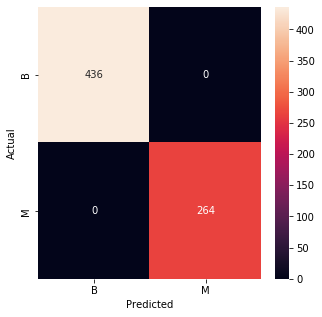

In [14]:
#GradientBoostingClassifier(random_state=0)
model = GradientBoostingClassifier(random_state=0)

print("A.1 Apply RFE for feature selection and select top 5 features")
# cross check feature extraction for this model
rfe = RFE(model, 5)
fit = rfe.fit(X_train, y_train)
#print("Num Features: %d" % fit.n_features_)
#print("Features: %s" % features_cols)
#print("Selected Features: %s" % fit.support_)
#print("Feature Ranking: %s" % fit.ranking_)

print("A.2 Prepare data with the top 5 features")
#Get data based on best 5 features for this model
model_cols = []
count = 0
for feat in fit.support_:
    if (feat):
        model_cols.append(features_cols[count])
    count+=1
print("A.3 The most important predictive variables are :")
print(model_cols)
model_cols += ['diagnosis', 'diagnosis_type']
df_breastcancer_data_model = df_breastcancer_data_sample[model_cols]
labels = df_breastcancer_data_model['diagnosis_type'] #y
features = df_breastcancer_data_model.iloc[:,:-2].values #x
X_train_model, X_test_model, y_train_model, y_test_model, = train_test_split(features, labels, test_size=0.20, random_state=30)

print("A.4 Train the model using train set")
#train the model
model.fit(X_train_model, y_train_model)
y_pred = model.predict(X_test_model)

print("A.5 Evaluate model using test set and visualized in Confusion Matrix")
conf_mat = confusion_matrix(y_test_model, y_pred)
fig, ax = plt.subplots(figsize=(5,5))
sns.heatmap(conf_mat, annot=True, fmt='d',
            xticklabels=df_breastcancer_data_model.diagnosis.unique(), yticklabels=df_breastcancer_data_model.diagnosis.unique())
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

##### Advantages of Gradient Boosting Classifier  
- Provides predictive accuracy that cannot be beat.  
- Works great with categorical and numerical values as is.  

##### Disadvantages of Gradient Boosting Classifier  
- May overemphasize outliers in data and cause overfitting.  
- Required expensive resources, can be time and memory exhaustive.  

#### B. Classification using Decision Tree Classifier

B.1 Apply RFE for feature selection and select top 5 features
B.2 Prepare data with the top 5 features
B.3 The most important predictive variables are :
['texture_mean', 'concave_points_mean', 'concave_points_sd_error', 'concave_points_worst', 'fractal_dimension_mean']
B.4 Train the model using train set
B.5 Evaluate model using test set and visualized in Confusion Matrix


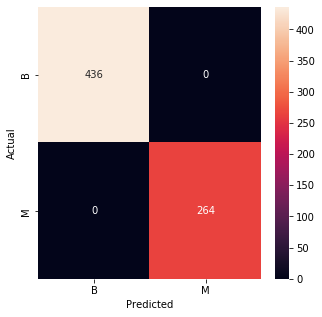

In [15]:
#DecisionTreeClassifier()
model = DecisionTreeClassifier()

print("B.1 Apply RFE for feature selection and select top 5 features")
# cross check feature extraction for this model
rfe = RFE(model, 5)
fit = rfe.fit(X_train, y_train)
#print("Num Features: %d" % fit.n_features_)
#print("Features: %s" % features_cols)
#print("Selected Features: %s" % fit.support_)
#print("Feature Ranking: %s" % fit.ranking_)

print("B.2 Prepare data with the top 5 features")
#Get data based on best 5 features for this model
model_cols = []
count = 0
for feat in fit.support_:
    if (feat):
        model_cols.append(features_cols[count])
    count+=1
print("B.3 The most important predictive variables are :")
print(model_cols)
model_cols += ['diagnosis', 'diagnosis_type']
df_breastcancer_data_model = df_breastcancer_data_sample[model_cols]
labels = df_breastcancer_data_model['diagnosis_type'] #y
features = df_breastcancer_data_model.iloc[:,:-2].values #x
X_train_model, X_test_model, y_train_model, y_test_model, = train_test_split(features, labels, test_size=0.20, random_state=30)

print("B.4 Train the model using train set")
#train the model
model.fit(X_train_model, y_train_model)
y_pred = model.predict(X_test_model)

print("B.5 Evaluate model using test set and visualized in Confusion Matrix")
conf_mat = confusion_matrix(y_test_model, y_pred)
fig, ax = plt.subplots(figsize=(5,5))
sns.heatmap(conf_mat, annot=True, fmt='d',
            xticklabels=df_breastcancer_data_model.diagnosis.unique(), yticklabels=df_breastcancer_data_model.diagnosis.unique())
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

##### Advantages of Decision Tree Classifier
- Less data processing efforts, does not require normalization of data.  
- Very intuitive and easy to explain.  

##### Disadvantages of Decision Tree Classifier
- Fit better to predict categorical outcome, inadequate for predicting continuous values.  
- Relatively unstable, high variance, small change in the data can cause a large change in the structure.  

#### C. Classification using Random Forest Classifier

C.1 Apply RFE for feature selection and select top 5 features
C.2 Prepare data with the top 5 features
C.3 The most important predictive variables are :
['perimeter_sd_error', 'concavity_worst', 'concave_points_sd_error', 'concave_points_worst', 'fractal_dimension_mean']
C.4 Train the model using train set
C.5 Evaluate model using test set and visualized in Confusion Matrix


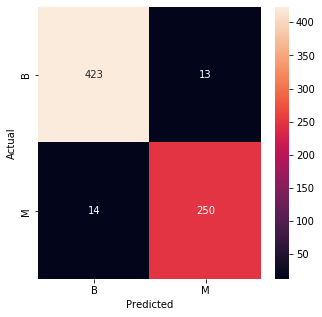

In [16]:
#RandomForestClassifier(n_estimators=200, max_depth=3, random_state=0)
model = RandomForestClassifier(n_estimators=200, max_depth=3, random_state=0)

print("C.1 Apply RFE for feature selection and select top 5 features")
# cross check feature extraction for this model
rfe = RFE(model, 5)
fit = rfe.fit(X_train, y_train)
#print("Num Features: %d" % fit.n_features_)
#print("Features: %s" % features_cols)
#print("Selected Features: %s" % fit.support_)
#print("Feature Ranking: %s" % fit.ranking_)

print("C.2 Prepare data with the top 5 features")
#Get data based on best 5 features for this model
model_cols = []
count = 0
for feat in fit.support_:
    if (feat):
        model_cols.append(features_cols[count])
    count+=1
print("C.3 The most important predictive variables are :")
print(model_cols)
model_cols += ['diagnosis', 'diagnosis_type']
df_breastcancer_data_model = df_breastcancer_data_sample[model_cols]
labels = df_breastcancer_data_model['diagnosis_type'] #y
features = df_breastcancer_data_model.iloc[:,:-2].values #x
X_train_model, X_test_model, y_train_model, y_test_model, = train_test_split(features, labels, test_size=0.20, random_state=30)

print("C.4 Train the model using train set")
#train the model
model.fit(X_train_model, y_train_model)
y_pred = model.predict(X_test_model)

print("C.5 Evaluate model using test set and visualized in Confusion Matrix")
conf_mat = confusion_matrix(y_test_model, y_pred)
fig, ax = plt.subplots(figsize=(5,5))
sns.heatmap(conf_mat, annot=True, fmt='d',
            xticklabels=df_breastcancer_data_model.diagnosis.unique(), yticklabels=df_breastcancer_data_model.diagnosis.unique())
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

##### Advantages of Random Forest Classifier
- Works well with non-linear data.  
- Lower risk of overfitting.  

##### Disadvantages of Random Forest Classifier
- Training time is slow.  
- Black box approach that is hard to explain.  

## 4.0 Explanation  

### 4.1 For Technical Audiences  
In this analysis, following technical challenge was encountered and few workaround was performed to address the limitation:  
1. Size of sample: the sample data conprises of just 569 records hence it is not sufficient to predict the tumor types. To address this issue, the bootstrap sampling function was leveraged to draw 3.5K random sample from the 569 records to train a better model.  
2. Limited knowledge on breast cancer cells: the selection of variables suitable for the cell identification are purely based on statistical analysis, where it can be more viable if advise from professional are available.  

Given opportunity, this analysis can be extended to next step where:  
1. Explore more source of data to gather larger dataset.  
2. If given more time, research can be performed to study the characteristic of breast cancer cells.  

### 4.2 Non-Technical Audiences
Write a short summary of your analysis, explaining how your model works and how it performs.
Briefly explain the factors that contributed to malignant vs benign tumor identification.

#### Objective  
The objective of this analysis is to predict for each cell, whether is it malignant or benign breast cancer cells.  

#### Expected Outcome    
To achieve this, a model need to be developed, so that given measurements of breast cancer cells, the model is able to predict if the cell is malignant or benign.  

#### Analysis Steps  
A sample that comprises of 569 breast cancer cells measurements was given. 

1. Assess Data Distribution  
The data was check to ensure that the data we used do not contain missing value. Fortunately, there is no missing value in the sample given.  

2. Dealing with Data Size  
Given this small dataset, the analysis may potentially corresponds too closely to this particular set of data, and may fail to predict future observations reliably. This issue is known as overfitting. To overcome this issue, a method to resample the data called bootstrapping is used.  

3. Variables Correlation  
The correlation of cells measurement to whether it is malignant or benign is inspect. Variables and it's correlation with the diagnosis are displayed in heatmap to provide quick insight on which variables is significantly identify the cell's type. These measurement matrix are found to be significantly differ malignant from benign cell: fractal_dimension_mean, concave_points_sd_error, perimeter_sd_error, concavity_worst, radius_worst, concave_points_worst, radius_mean, texture_mean.  

4. Assess Classification Algorithm  
5 algorithms that are commonly used for classification are evaluated and 3 algorithms that perform best are trainned using the sample. The algorithms chosen are GradientBoostingClassifier (0.999429), DecisionTreeClassifier (1.000000), and RandomForestClassifier (0.962000).  

5. Model Training  
3 models are trainned. The models, and the estimated accuracy, are depicted below:  

5.1. Model 1: Gradient Boosting Classifier  
This model best predict with variables: 'perimeter_sd_error', 'concavity_worst', 'concave_points_mean', 'concave_points_worst', 'fractal_dimension_mean'. It yield close to 99.9143% accuracy when evaluated with the test data.  

5.2. Model 2: Decision Tree Classifier  
This model best predict with variables: 'perimeter_sd_error', 'concave_points_mean', 'concave_points_sd_error', 'concave_points_worst', 'fractal_dimension_sd_error'. It yield close to 99.9714% accuracy when evaluated with the test data. 

5.3. Model 3: Random Forest Classifier  
This model best predict with variables: 'perimeter_sd_error', 'concavity_worst', 'concave_points_sd_error', 'concave_points_worst', 'fractal_dimension_mean'. It yield close to 96.4000% accuracy when evaluated with the test data. 

# Part 2: Review Student Code  
Objective: Scan and debug student code, while providing helpful feedback or tips.  

## 1. Code  
Comment on style, library usage, or other improvements.  

In [17]:
print("student-sample-1.py")
#!/usr/bin/env python
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
#from sklearn import LinearRegression #cannot import name 'LinearRegression' from 'sklearn'
from sklearn.model_selection import cross_val_score
#from sklearn.cross_validation import cross_val_score #No module named 'sklearn.cross_validation'

# Load data
data = pd.read_csv('../data/train.csv')
#d = pd.read_csv('../data/train.csv') #name 'data' is not defined

# Setup data for prediction
x1 = data.SalaryNormalized #name 'data' is not defined
x2 = pd.get_dummies(data.ContractType)

# Setup model
model = LinearRegression()

# Evaluate model
#from sklearn.cross_validation import cross_val_score #already import, but no module named 'sklearn.cross_validation'
#from sklearn.model_selection import train_test_split
#from sklearn.cross_validation import train_test_split #No module named 'sklearn.cross_validation'
#Do not import library that is not in used

scores = cross_val_score(model, x2, x1, cv=2, scoring='neg_mean_absolute_error') 
#scores = cross_val_score(model, x2, x1, cv=1, scoring='mean_absolute_error') 
#the scoring predefined value for metrics.mean_absolute_error is ‘neg_mean_absolute_error’
#cross validation need >1 fold

print(scores.mean())

student-sample-1.py
-11733.827883047155


### student-sample-1.py
1. It's good to load all library on top so readers have an overview on what library package were used.  
2. Always import library from the correct module in sklearn:  
. sklearn.linear_model for LinearRegression  
. sklearn.model_selection for cross_val_score  
. sklearn.model_selection for train_test_split  
3. Don't need to import the same library twice  
4. Don't import library that is not in used (train_test_split)
5. Always check if all variables are well defined (data vs d)
6. Check predefined values for parameters in sklearn functions: https://scikit-learn.org/stable/modules/model_evaluation.html  

In [18]:
print("student-sample-2.py")
#!/usr/bin/env python
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
#from sklearn.cross_validation import cross_val_score #No module named 'sklearn.cross_validation'

# Load data
data = pd.read_csv('../data/train.csv')

# Setup data for prediction
y = data.SalaryNormalized
X = pd.get_dummies(data.ContractType)

# Setup model
model = LinearRegression()

# Evaluate model
scores = cross_val_score(model, X, y, cv=5, scoring='neg_mean_absolute_error')
#scores = cross_val_score(model, X, y, cv=5, scoring='mean_absolute_error')
#the scoring predefined value for metrics.mean_absolute_error is ‘neg_mean_absolute_error’
print(scores.mean())

student-sample-2.py
-11822.140231295069


### student-sample-2.py
1. Always import library from the correct module in sklearn:
- sklearn.model_selection for cross_val_score    
2. Check predefined values for parameters in sklearn functions: https://scikit-learn.org/stable/modules/model_evaluation.html  

## 2. Methodology
Comment on the student's data setup, modeling methodology, and model evaluation.  

### student-sample-1.py  
Data setup and modeling methodology is adhering to standard flow, however, the student's code exhibit that there is lack of planning (import library in the middle of the code when needed), understanding on the usage of library (importing library that is not being used) and variables control (using two different name for same variable: data vs d). When using predefine function, it is always good to cross-check documentation of the functions to make sure parameter are constructed correctly.  

### student-sample-2.py  
Data setup and modeling methodology is adhering to standard flow, the execution is smooth. When using predefine function, it is always good to cross-check documentation of the functions to make sure parameter are constructed correctly.  

## 3. Conceptual Understanding  
Suggestions or takeaways on how the student could continue to improve their understanding of these concepts.  

### student-sample-1.py  
Student is advisable to practise more in term of variables definition, usage of functions in each scikit learn modules. Student may also study the conceptual idea of cross-validation, K-Fold to strengthen the knowledge in this areas.  

### student-sample-2.py  
Student demonstrate good understanding on the task. Student may perform in-depth study on various scikit learn modules to groom ideas on applying them to solve problems.  